<a href="https://colab.research.google.com/github/Andru-1987/74235-_DataScience_I/blob/main/clase_8/linear-ejemplo-real.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regresion lineal

##Sección 1- Presentación del problema específico

### 💼 Empezar tu carrera en IT puede ser abrumador… pero no estás solo

Si sos un joven profesional recién graduado y estás buscando tu primer trabajo en el sector IT, seguramente te sientas desbordado por la cantidad de información disponible. ¿Qué empresas ofrecen buenas condiciones? ¿Dónde se paga mejor? ¿Cómo saber si estás recibiendo un salario justo?

👉 ¡Estamos acá para ayudarte!

Hemos desarrollado una herramienta colaborativa que te permite **calificar empresas** en las que trabajaste, **compartir tus experiencias** con otros profesionales y acceder a información clave sobre el mercado laboral en tecnología.

Además, realizamos una investigación profunda sobre el estado actual del empleo en IT, analizando miles de datos para responder las preguntas que más te preocupan:

* ¿Qué empresas tienen mejor reputación entre jóvenes talentos?
* ¿Cómo varían los salarios según experiencia, rol o género?
* ¿Qué tan inclusivo y equitativo es el sector?

### 📊 Lo que encontramos

Nuestro estudio revela algunas desigualdades preocupantes:

* Una **brecha de género persistente**, especialmente en roles de liderazgo.
* **Diferencias salariales** marcadas según la antigüedad y el género.
* Y una necesidad urgente de mayor transparencia en las condiciones laborales.

Pero también encontramos señales de cambio: muchas empresas están tomando medidas concretas para mejorar sus prácticas, y hay una comunidad creciente de profesionales comprometidos con un futuro más justo.

### 🚀 ¿Por qué te sirve esto?

Nuestro informe está diseñado para vos: **visualizaciones claras**, **análisis accesibles** y recomendaciones prácticas que te ayudarán a tomar decisiones informadas sobre tu carrera.



### **Datos utilizados**

Los datos empleados en este estudio provienen de **encuestas de sueldos realizadas en 2020** a profesionales del sector tecnológico en **la ciudad de Buenos Aires y el conurbano bonaerense**. Estas encuestas fueron diseñadas y ejecutadas por un equipo especializado en recursos humanos y análisis de datos, con el objetivo de relevar información detallada sobre **salarios, experiencia, posición laboral, industria y otros factores asociados a la remuneración**.

Antes de su análisis, los datos fueron sometidos a un proceso riguroso de **limpieza y depuración**, que incluyó:

* Eliminación de columnas con alto porcentaje de valores faltantes.
* Renombramiento de variables con etiquetas poco claras.
* Detección y remoción de outliers.
* Selección de variables más relevantes mediante análisis de correlación.

Este tratamiento permitió mejorar la **calidad, consistencia y relevancia del conjunto de datos**, garantizando una base sólida para explorar la distribución salarial y detectar posibles inequidades en el sector tecnológico argentino.


#Sección 2- Preguntas que buscamos responder

**2.1 Hipótesis**

2.1.1 Hipótesis 1: Los hombres al menos triplican en cantidad de profesionales a las mujeres

2.1.2 Hipótesis 2: La mayor cantidad de los profesionales se encuentran entre los 30 y 40 años

2.1.3 Hipótesis 3: Existe inequidad de género porque los hombres tienen un salario mayor a las mujeres

2.1.4 Hipótesis 4: Los salarios más altos corresponden a los técnicos con mayor cantidad de años de experiencia

2.1.5 Hipótesis 5: Las personas que mantienen sus puestos de trabajo poseen mayores salarios que los profesionales que recién ingresan a las empresas. Se va a comparar a las personas que tienen menos de 5 años en un mismo puesto


**2.2 Conclusiones Hipótesis**

2.1.1 Hipótesis 1: Verdadero. Prácticamente hay 5 veces más hombres que mujeres en el sector

2.1.2 Hipótesis 2: Falso. La mayor cantidad de los profesionales se encuentran entre los 25 y 35 años

2.1.3 Hipótesis 3: Verdadero. Prácticamente el salario promedio de un hombre es 20% mayor al de una mujer promedio

2.1.4 Hipótesis 4: Dudoso. Los salarios más altos corresponden a los técnicos que poseen más de 10 años de experiencia. Luego hay un estancamiento en el salario. Es decir, que una persona que tiene 20 años no suele ganar más que una que tiene 10 años

2.1.5 Hipótesis 5: Falso. No se puede identificar una correlación entre los salarios y el tiempo de pertenencia en un puesto laboral

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
raw_table_csv = "https://raw.githubusercontent.com/eea-uba/EEA-2022/main/Fuentes/Encuesta%20de%20remuneracion%20salarial%20-%202020.1.csv"

In [6]:
df = pd.read_csv(raw_table_csv, index_col=0)
df.head()

,Me identifico,Tengo,Estoy trabajando en,Dónde estás trabajando,Bolivia,Chile,Colombia,Cuba,Costa Rica,Ecuador,...,¿A qué eventos de tecnología asististe en el último año?,¿Sos miembro de alguna comunidad IT?,Cantidad de empleados,Actividad principal,¿La recomendás como un buen lugar para trabajar?,¿Cómo calificás las políticas de diversidad e inclusión?,¿A cuántos kilómetros de tu casa queda la oficina?,Beneficios extra,¿Habías respondido nuestra encuesta en ediciones anteriores?,"¿Cuáles considerás que son las mejores empresas de IT para trabajar en este momento, en tu ciudad?"
Timestamp,,,,,,,,,,,,,,,,,,,,,
1/31/2020 6:50:26,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10001+,Producto basado en Software,8,10,6.0,"Capacitaciones y/o cursos, Comidas pagas / sub...",No,cognizant
1/28/2020 9:27:48,Hombre,30,Argentina,Ciudad Autónoma de Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,51-100,Otras industrias,7,3,35.0,Capacitaciones y/o cursos,No,mercadolibre
1/29/2020 16:54:29,Mujer,40,Argentina,Ciudad Autónoma de Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,8,8,30.0,"Abono de celular y/o Internet, Capacitaciones ...",No,NaN
2/1/2020 5:46:25,Mujer,36,Argentina,Ciudad Autónoma de Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,51-100,Otras industrias,7,5,4.0,Viáticos,No,NaN
2/1/2020 17:51:21,Hombre,29,Argentina,Ciudad Autónoma de Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,11-50,Otras industrias,5,8,7.0,Ninguna de las anteriores,No,NaN


In [7]:
#Cambio nombre de Me identifico por Genero

df.rename(columns= {"Me identifico":"Genero"}, inplace = True)

#Cambio nombre de Tengo por Edad
df.rename(columns= {"Tengo":"Edad"}, inplace = True)

#Quito lo de tu moneda local

df.rename(columns= {"Salario mensual BRUTO (en tu moneda local)":"SalarioB"}, inplace = True)


df.rename(columns= {"Salario mensual NETO (en tu moneda local)":"SalarioN"}, inplace = True)


#Borrar varias columnas que no tienen datos, todos trabajan en Argentina
df = df.drop(columns=['Estoy trabajando en', 'Dónde estás trabajando','Bolivia', 'Chile', 'Colombia', 'Cuba', 'Costa Rica', 'Ecuador','El Salvador', 'Guatemala', 'Honduras', 'México', 'Nicaragua', 'Panamá',
'Paraguay', 'Perú', 'Puerto Rico', 'República Dominicana', 'Uruguay', 'Venezuela'])

df.columns

Index(['Genero', 'Edad', 'Años de experiencia', 'Años en la empresa actual',
       'Años en el puesto actual', '¿Gente a cargo?',
       'Nivel de estudios alcanzado', 'Estado', 'Carrera', 'Universidad',
       'Realizaste cursos de especialización',
       '¿Contribuís a proyectos open source?', '¿Programás como hobbie?',
       'Trabajo de', 'Plataformas', 'Lenguajes de programación',
       'Frameworks, herramientas y librerías', 'Bases de datos',
       'QA / Testing', 'IDEs', '¿Qué SO usás en tu laptop/PC para trabajar?',
       '¿Y en tu celular?', '¿Tenés guardias?', 'Cuánto cobrás por guardia',
       '¿Porcentaje, bruto o neto?', 'Tipo de contrato', 'SalarioB',
       'SalarioN', '¿Qué tan conforme estás con tu sueldo?',
       'Cómo creés que está tu sueldo con respecto al último semestre',
       'Recibís algún tipo de bono', 'A qué está atado el bono',
       '¿Tuviste ajustes por inflación en 2019?',
       '¿De qué % fue el ajuste total?', '¿En qué mes fue el último ajus

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5982 entries, 1/31/2020 6:50:26 to 2/2/2020 4:45:31
Data columns (total 49 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   Genero                                                                                              5982 non-null   object 
 1   Edad                                                                                                5982 non-null   int64  
 2   Años de experiencia                                                                                 5982 non-null   float64
 3   Años en la empresa actual                                                                           5982 non-null   float64
 4   Años en el puesto actual                                                                   

**Hipotesis 1**

*Hipotesis 1: Los hombres al menos triplican en cantidad de profesionales a las mujeres*

**Conclusión 1**

*Hipotesis 1: Verdadero. Prácticamente hay 5 veces más hombres que mujeres en el sector*


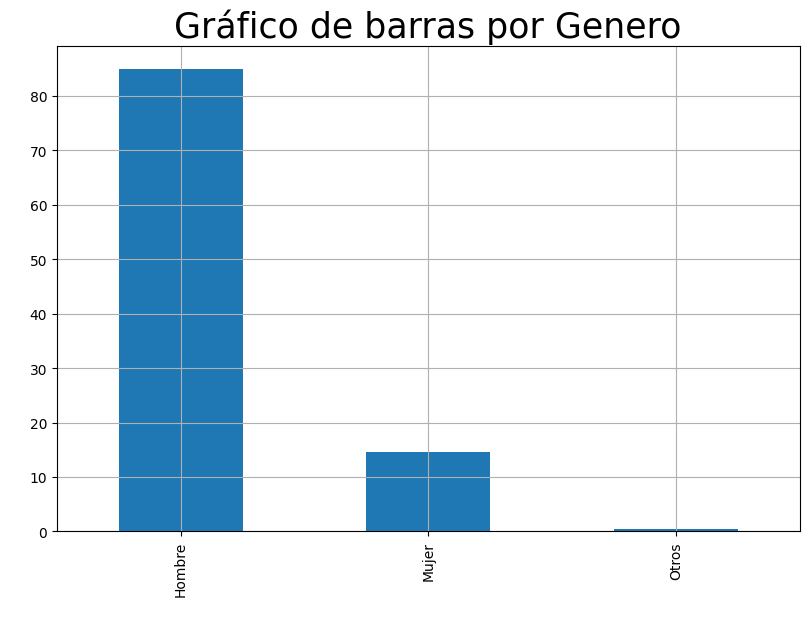

In [9]:
fig = plt.figure(figsize=(8, 6))
(df["Genero"].value_counts(normalize=True)*100).plot(kind="bar")
plt.tight_layout() #evitar el superposicionamiento
plt.title("Gráfico de barras por Genero", color='black', fontsize=25)
plt.xlabel("Genero", color='white')
plt.ylabel("Porcentaje", color="white")
plt.grid(True) #Para en forma de cuadricula
fig.set_facecolor("white")

**2.1.2 Hipotesis 2**

*Hipotesis 2: La mayor cantidad de los profesionales se encuentran entre los 30 y 40 años*

**Conclusión 2**

*Hipotesis 2: Falso. La mayor cantidad de los profesionales se encuentran entre los 25 y 35 años*




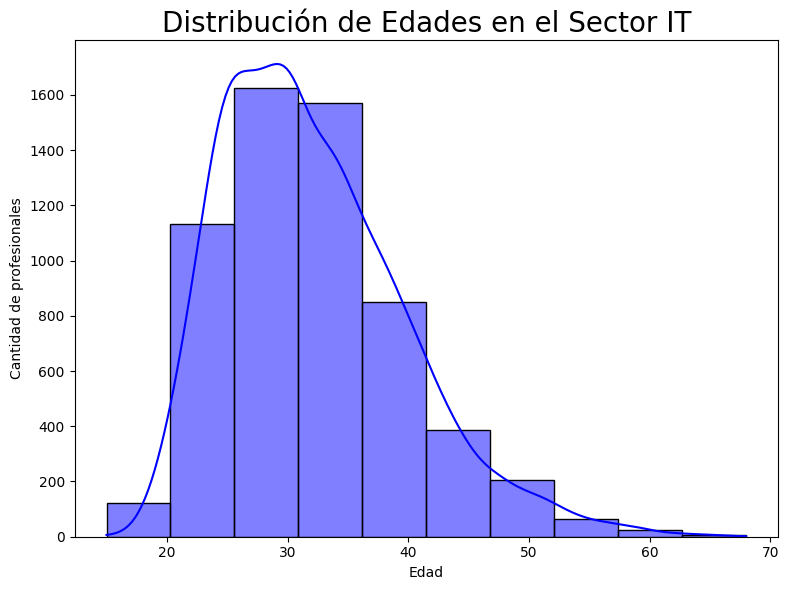

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df["Edad"], bins=10, color="blue", kde=True, edgecolor="black")

plt.title("Distribución de Edades en el Sector IT", color='black', fontsize=20)
plt.xlabel("Edad")
plt.ylabel("Cantidad de profesionales")
plt.gcf().set_facecolor("white")  # Establece fondo blanco
plt.tight_layout()
plt.show()


---
**Analisis Bivariado**

El código presentado realiza un análisis bivariado de la distribución de la edad por género utilizando un gráfico de violín. Los violines representan la distribución de la edad para cada género y su ancho representa la densidad de la distribución en esa edad. La posición de los violines indica la mediana y la forma del violín muestra la asimetría de la distribución. Este gráfico es útil para comparar la distribución de la edad entre diferentes géneros en un solo vistazo. El código además establece el título y el tamaño del gráfico para una mejor visualización.


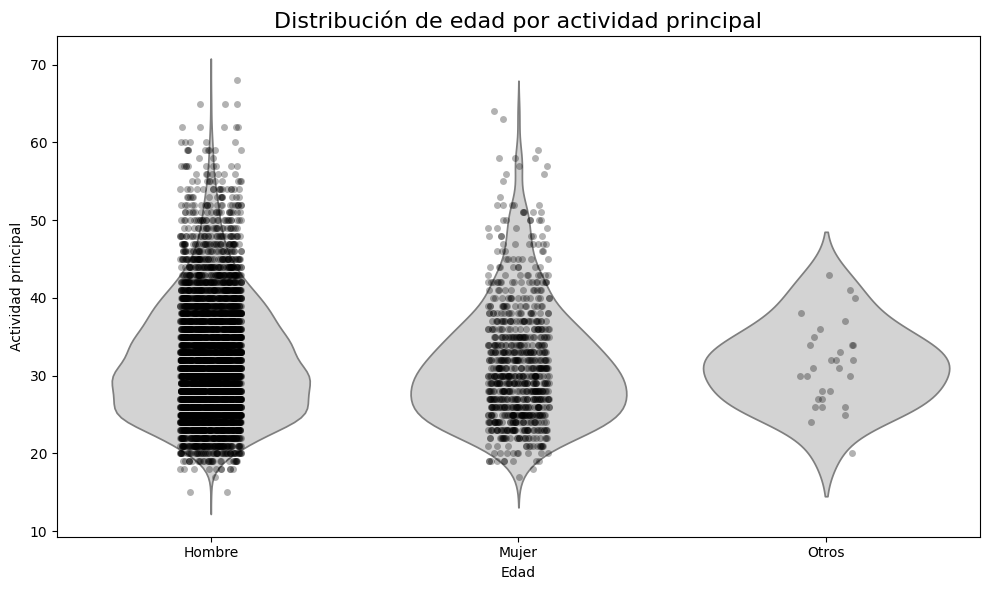

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10, 6))

sns.violinplot(data=df, x='Genero', y='Edad', inner=None, color="lightgray")
sns.stripplot(data=df, x='Genero', y='Edad', jitter=True, alpha=0.3, color="black")

plt.title("Distribución de edad por actividad principal", color='black', fontsize=16)
plt.xlabel("Edad")
plt.ylabel("Actividad principal")

fig.set_facecolor("white")
plt.tight_layout()
plt.show()



/tmp/ipython-input-13-173062293.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


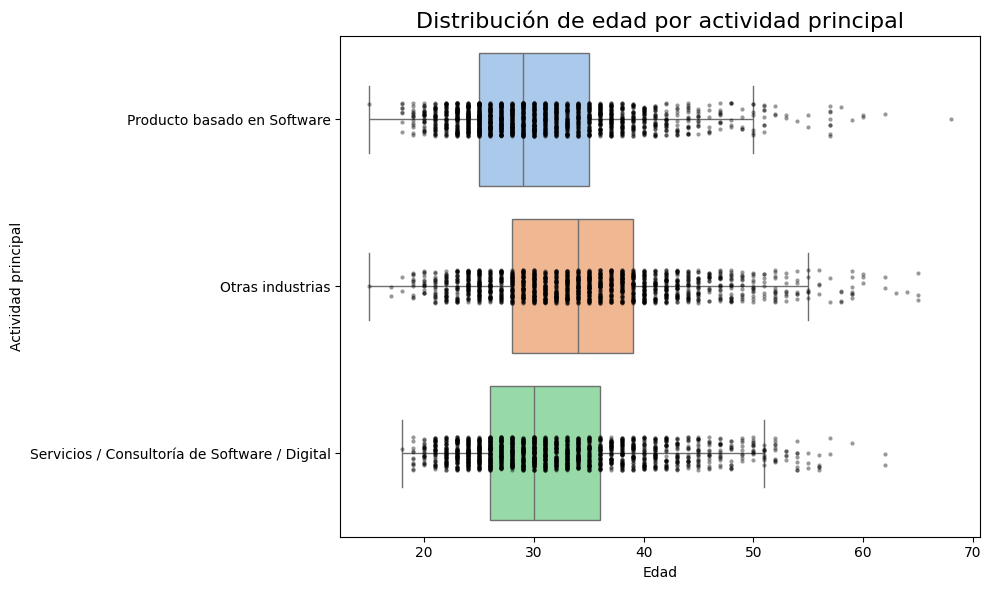

In [13]:
fig = plt.figure(figsize=(10, 6))

# Boxplot base (resumen estadístico)
sns.boxplot(
    data=df,
    x='Edad',
    y="Actividad principal",
    palette="pastel",
    fliersize=0  # Opcional: oculta los outliers del boxplot (los mostrará stripplot)
)

# Stripplot encima (datos individuales)
sns.stripplot(
    data=df,
    x='Edad',
    y="Actividad principal",
    color="black",
    size=3,
    jitter=True,
    alpha=0.4
)

plt.title("Distribución de edad por actividad principal", fontsize=16, color="black")
plt.xlabel("Edad")
plt.ylabel("Actividad principal")
fig.set_facecolor("white")
plt.tight_layout()
plt.show()


 Se puede observar que la mediana de edad para el sector de "otras industrias" está ligeramente por encima de los otros dos grupos, que son "comercio" e "industria manufacturera". Sin embargo, la diferencia en la mediana es de solo 2 o 3 años, lo que sugiere que la edad no es un factor determinante en la elección de la actividad laboral en el sector.

El gráfico de barras apiladas mejora la presentación visual de la información, permitiendo una mejor comparación entre las diferentes actividades y géneros. En este caso, podemos ver que las actividades tienen porcentajes similares en cada género, pero la cantidad de hombres es significativamente superior a la de mujeres en el sector.

El análisis bivariado nos permite visualizar de manera clara la diferencia en la distribución de género en cada actividad y cómo estas se comparan entre sí. El gráfico de barras apiladas nos muestra la relación entre dos variables categóricas, género y actividad principal. La altura de cada barra representa la proporción de hombres y mujeres en cada actividad, y la longitud de la barra representa la proporción de personas que se dedican a esa actividad.

En este caso, podemos ver que las actividades tienen porcentajes similares en cada género, pero la cantidad de hombres es significativamente superior a la de mujeres en el sector.

Este gráfico nos permite visualizar de manera clara la diferencia en la distribución de género en cada actividad y cómo estas se comparan entre sí. Además, la leyenda nos permite identificar fácilmente qué color representa a cada género y tener una mejor comprensión del gráfico en su totalidad.


<Figure size 1000x600 with 0 Axes>

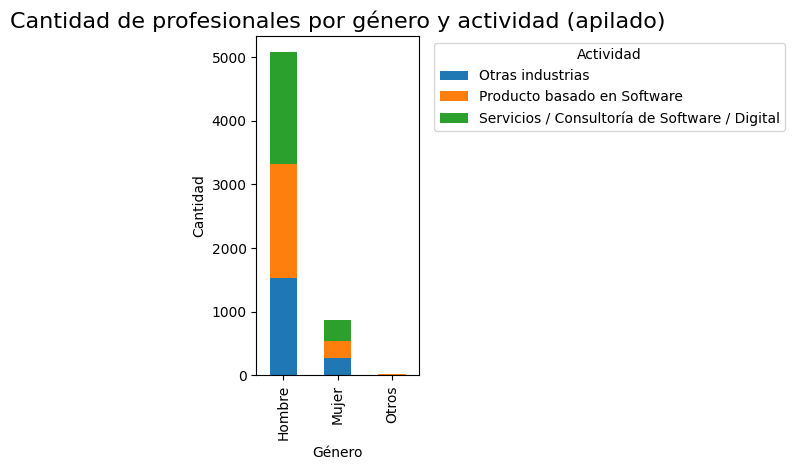

In [17]:
# Preparar los datos en formato largo

actividad_genero = df.groupby(["Genero", "Actividad principal"]).size().reset_index(name="Cantidad")
actividad_genero_pivot = actividad_genero.pivot(index="Genero", columns="Actividad principal", values="Cantidad").fillna(0)
plt.figure(figsize=(10, 6), facecolor="white")

actividad_genero_pivot.plot(kind="bar", stacked=True)

plt.title("Cantidad de profesionales por género y actividad (apilado)", fontsize=16)
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.legend(title="Actividad", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
